#    **Profil**

  Auriwan Yasper

  Email : auriwanyasper@gmail.com

  LinkedIn : www.linkedin.com/in/auriwan-yasper-005628145

  Instagram : https://www.instagram.com/el_thobhy/

# **Proyek Akhir : Klasifikasi Gambar Batu Gunting Kertas**

In [1]:
#import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os

In [2]:
#Download dataset dengan wget
!wget --no-check-certificate https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
-O /dataku/rockpaperscissors.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [220]:
#Ekstrak zip file
local_zip='/dataku/rockpaperscissors.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/dataset_baru')
zip_ref.close()

In [225]:
#chek structur data gambar scissors rocks pappers 
data_directory='/dataset_baru/rockpaperscissors/rps-cv-images'
os.listdir(data_directory)

['scissors', 'README_rpc-cv-images.txt', 'rock', 'paper']

# **Implementasi Augmentasi Gambar Imaga Data Generator**

In [227]:
#Augmentasi gambar setiap sampel
data_generator=ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

# **Pembagian** **dataset**

In [226]:
#Menyiapkan data train dan data validasi dari dataset 
data_training = data_generator.flow_from_directory(
        data_directory,
        target_size=(100, 150), 
        shuffle=True,
        subset='training')
 
data_validasi = data_generator.flow_from_directory(
        data_directory,
        target_size=(100, 150),
        shuffle=True,
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Membuat Model CNN**

In [2]:
#Membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [3]:
#Melihat summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 148, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 17, 64)        0

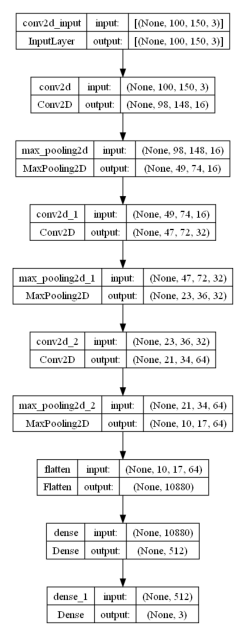

In [4]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#Visualisasi Arsitektur
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

#Menampilkan gambar arsitektur model
img = plt.imread('cnn_model.png')
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

# **Penggunaan Callback**

In [230]:
#Callback
#class untuk menghentikan training ketika akurasi telah mencapai 97%

class callbackDulu(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>= 0.97):
      print("\nAkurasi sudah lebih besar atau sama dengan 97%")
      self.model.stop_training = True

henti=callbackDulu()      

# **Compile dan Training Model**

In [231]:
#compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [232]:
#training model 
trainMod=model.fit(
      data_training,
      steps_per_epoch=32,
      epochs=20,
      validation_data=data_validasi,
      validation_steps=4,
      verbose=2,
      callbacks=[henti])

Epoch 1/20
32/32 - 14s - loss: 1.1663 - accuracy: 0.4053 - val_loss: 1.0124 - val_accuracy: 0.5156 - 14s/epoch - 452ms/step
Epoch 2/20
32/32 - 14s - loss: 0.7713 - accuracy: 0.6621 - val_loss: 0.7236 - val_accuracy: 0.7266 - 14s/epoch - 434ms/step
Epoch 3/20
32/32 - 14s - loss: 0.3968 - accuracy: 0.8672 - val_loss: 0.3733 - val_accuracy: 0.8359 - 14s/epoch - 423ms/step
Epoch 4/20
32/32 - 13s - loss: 0.3486 - accuracy: 0.8602 - val_loss: 0.2804 - val_accuracy: 0.9141 - 13s/epoch - 420ms/step
Epoch 5/20
32/32 - 13s - loss: 0.2150 - accuracy: 0.9356 - val_loss: 0.2037 - val_accuracy: 0.9531 - 13s/epoch - 420ms/step
Epoch 6/20
32/32 - 13s - loss: 0.1382 - accuracy: 0.9507 - val_loss: 0.1692 - val_accuracy: 0.9062 - 13s/epoch - 417ms/step
Epoch 7/20
32/32 - 13s - loss: 0.1162 - accuracy: 0.9608 - val_loss: 0.2273 - val_accuracy: 0.9375 - 13s/epoch - 421ms/step
Epoch 8/20
32/32 - 14s - loss: 0.1003 - accuracy: 0.9648 - val_loss: 0.2272 - val_accuracy: 0.9297 - 14s/epoch - 422ms/step
Epoch 9/

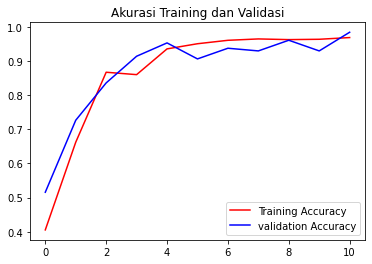

<Figure size 432x288 with 0 Axes>

In [233]:
#grafik perbandingan Training set dan validation set
import matplotlib.pyplot as plt
accuracy=trainMod.history['accuracy']
val_accuracy=trainMod.history['val_accuracy']
loss=trainMod.history['loss']
val_loss=trainMod.history['val_loss']
epoch=range(len(accuracy))

#plot garafik perbandingannya
plt.plot(epoch, accuracy, 'r', label='Training Accuracy')
plt.plot(epoch, val_accuracy, 'b', label='validation Accuracy')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()


# **Pengujian Model**

In [234]:
#import library untuk pengujian model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving kertas.PNG to kertas (1).PNG
kertas.PNG
Kertas


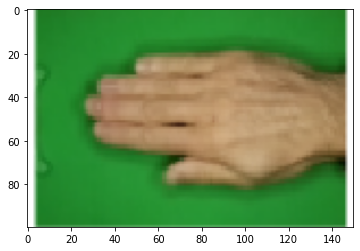

In [241]:
#Pengujian Model
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')
  else:
    print('tidak diketahui')